## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

## 調整 DecisionTreeClassifier(...) 中的參數

如果要使用視覺輸出~
先參考: https://blog.csdn.net/qq_40304090/article/details/88594813

最後記得要加到環境變數中(手動加入如果有問題，就執行下方程式加入)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'  #注意修改你的路径

In [158]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 以下為使用graphviz套件需要匯入的檔案
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [159]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)
# 建立分類樹模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth= None) #使用"熵(entropy)"
# 訓練資料
clf.fit(x_train, y_train)
# 預測
pred = clf.predict(x_test)

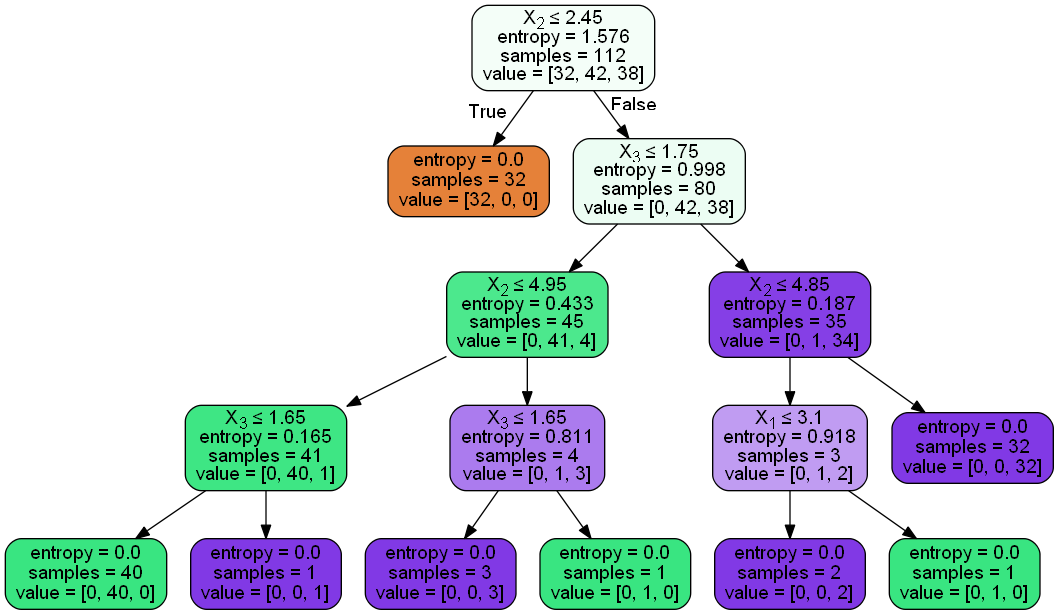

In [160]:
#使用export_graphviz劃出視覺圖
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [161]:
# 準確率
acc = metrics.accuracy_score(y_test, pred)
print("accuracy: ",acc)

accuracy:  0.9736842105263158


In [162]:
#特徵
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [163]:
print("Feature importance :\n",clf.feature_importances_)

Feature importance :
 [0.         0.0156062  0.62264163 0.36175217]


## 使用回歸樹預測boston房價

In [164]:
#讀取boston數據
boston = datasets.load_boston()

In [165]:
#切分資料
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size =0.2, random_state=4)
#匯入模型分類樹
reg = DecisionTreeRegressor(criterion="mse",max_depth= None) #若限制深度誤差會提升
#訓練資料
reg.fit(x_train, y_train)
# 預測測試集
pred = reg.predict(x_test)

In [166]:
#使用export_graphviz劃出視覺圖
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [167]:
print('Mean squared error: {}'.format(mean_squared_error(y_test,pred)))

Mean squared error: 25.265686274509807


##使用分類樹預測wine分類

In [168]:
#讀取wine資料
wine = datasets.load_wine()

In [169]:
#分割資料
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size= 0.2, random_state= 4)
#帶入分類樹模型
clf = DecisionTreeClassifier(criterion='entropy')
#訓練數據
clf.fit(x_train, y_train)
#預測
pred = clf.predict(x_test)

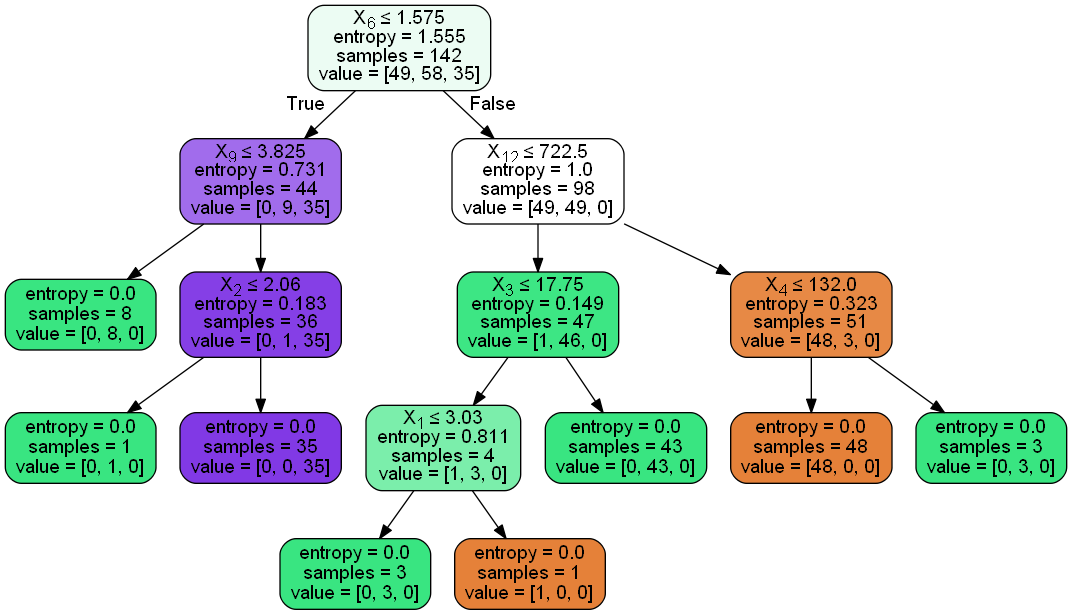

In [170]:
#使用export_graphviz劃出視覺圖
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [171]:
#使用accuracy評估
acc = metrics.accuracy_score(y_test, pred)
print('accuract:',acc)

accuract: 0.9722222222222222
